<a href="https://colab.research.google.com/github/Ninja7328/ML-Practicing/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models,models,optimizers
import numpy as np

In [2]:
#Generator model

def build_generator(latent_dim):
  model = models.Sequential([
      layers.Dense(128,input_dim=latent_dim),
      layers.LeakyReLU(alpha=0.2),
      layers.Dense(784,activation='tanh'),
      layers.Reshape((28,28))
  ])
  return model

In [3]:
# Discriminator model

def build_discriminator():
  model = models.Sequential([
      layers.Flatten(input_shape=(28,28)),
      layers.Dense(128),
      layers.LeakyReLU(alpha=0.2),
      layers.Dense(1,activation='sigmoid')
  ])
  return model

In [4]:
# GAN model

def build_gan(generator, discriminator):
  model = models.Sequential([
      generator,
      discriminator
  ])
  discriminator.trainable = False                 #Freeze discriminator during GAN training
  return model

In [5]:
# Load MNIST data

(train_images, _), (_,_) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0],28,28).astype('float32')

train_images = (train_images - 127.5)/127.5        #Normalize to [-1,1]

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
latent_dim = 100

generator = build_generator(latent_dim)

discriminator = build_discriminator()

gan = build_gan(generator, discriminator)

discriminator.compile(loss='binary_crossentropy',optimizer = optimizers.Adam(lr = 0.0002, beta_1 = 0.5))

gan.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(lr=0.0002,beta_1 = 0.5))

In [7]:
# Training loop

epochs = 5
batch_size = 128
steps_per_epoch = train_images.shape[0] // batch_size

for epoch in range(epochs):
  for step in range(steps_per_epoch):
    #Train discriminator
    real_images = train_images[np.random.randint(0, train_images.shape[0], batch_size)]
    fake_images = generator.predict(np.random.normal(0,1, (batch_size, latent_dim)))
    discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)

    #Train generator
    noise = np.random.normal(0,1, (batch_size, latent_dim))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    #Print progress
    print(f"Epochs {epoch+1}/{epochs}, Step {step+1}/{steps_per_epoch}, "
    f"Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 1/468, Discriminator Loss: 0.6144498586654663, Generator Loss: 0.7674732804298401
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 2/468, Discriminator Loss: 0.8764479458332062, Generator Loss: 0.4058696925640106
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 3/468, Discriminator Loss: 1.144112080335617, Generator Loss: 0.2128159999847412
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 4/468, Discriminator Loss: 1.4435250163078308, Generator Loss: 0.12428800016641617
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 5/468, Discriminator Loss: 1.7046679258346558, Generator Loss: 0.07145792990922928
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 6/468, Discriminator Loss: 1.8773433864116669, Generator Loss: 0.05035511404275894
4/4 [==============================] - 0s 2ms/step
Epochs 1/5, Step 7/468, Discriminator Loss: 1.9

1/1 [==============================] - 0s 106ms/step


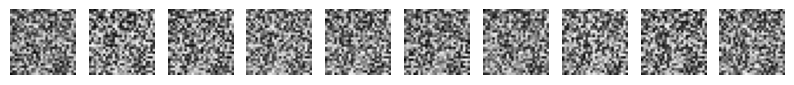

In [11]:
import matplotlib.pyplot as plt

def visulaize_generated_images(generator, latent_dim, num_images=10):
  noise = np.random.normal(0,1, (num_images, latent_dim))
  generated_images = generator.predict(noise)


  plt.figure(figsize=(10,10))
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
  plt.show()

visulaize_generated_images(generator, latent_dim)